<p style="font-family:Verdana; font-size: 26px; color: magenta"> 3 ML - Parkinson Disease Prediction using Machine Learning - Python</p>

<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 1. Data Collection:</p> 
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 2. Data Preprocessing:</p>
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 3. Feature Selection:</p>
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 4. Splitting the Dataset:</p>
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 5. Training the Model:</p>
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 6. Evaluating the Model:</p>
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 7. Making Predictions:</p>

<p style="font-family:Verdana; font-size: 18px; color: orange"> Step 1: Importing Necessary Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from tqdm.notebook import tqdm
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 2: Data Preparation</p>

In [8]:
# The dataset we are going to use here includes 755 columns and three observations for each patient.
df = pd.read_csv('../../data/parkinson_disease.csv')
# To display the maximum number of columns in a Pandas DataFrame, you can use the pd.set_option() function.
pd.set_option('display.max_columns', 10)

df.head(), df.shape 

(   id  gender      PPE      DFA     RPDE  ...  tqwt_kurtosisValue_dec_33  \
 0   0       1  0.85247  0.71826  0.57227  ...                     4.4625   
 1   0       1  0.76686  0.69481  0.53966  ...                     9.5082   
 2   0       1  0.85083  0.67604  0.58982  ...                     4.8066   
 3   1       0  0.41121  0.79672  0.59257  ...                     4.6857   
 4   1       0  0.32790  0.79782  0.53028  ...                    11.6891   
 
    tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35  \
 0                     2.6202                     3.0004   
 1                     6.5245                     6.3431   
 2                     2.9199                     3.1495   
 3                     4.8460                     6.2650   
 4                     8.2103                     5.0559   
 
    tqwt_kurtosisValue_dec_36  class  
 0                    18.9405      1  
 1                    45.1780      1  
 2                     4.7666      1  
 3                

In [5]:
df.sample(5)

,id,gender,PPE,DFA,RPDE,...,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
130,43,1,0.84398,0.73136,0.31485,...,3.4873,9.1099,5.6423,21.7226,1
89,29,0,0.82760,0.63579,0.24278,...,4.3029,3.9654,3.2715,2.9646,0
256,85,1,0.84620,0.72659,0.29898,...,9.7772,7.2245,6.6474,6.9022,1
93,31,1,0.78913,0.80000,0.55702,...,20.2445,17.3021,14.3486,41.9353,1
503,167,1,0.84981,0.71816,0.45878,...,3.2354,3.4099,2.9277,8.1257,1


<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 2+: Data Exploration and Cleaning</p>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,125.500000,72.793721,0.000000,62.750000,125.500000,188.250000,251.00000
gender,756.0,0.515873,0.500079,0.000000,0.000000,1.000000,1.000000,1.00000
PPE,756.0,0.746284,0.169294,0.041551,0.762833,0.809655,0.834315,0.90766
DFA,756.0,0.700414,0.069718,0.543500,0.647053,0.700525,0.754985,0.85264
RPDE,756.0,0.489058,0.137442,0.154300,0.386537,0.484355,0.586515,0.87123
...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_33,756.0,12.375335,16.341665,1.628700,3.114375,4.741450,12.201325,73.53220
tqwt_kurtosisValue_dec_34,756.0,14.799230,15.722502,1.861700,3.665925,6.725700,21.922050,62.00730
tqwt_kurtosisValue_dec_35,756.0,14.751559,14.432979,1.955900,3.741275,7.334250,22.495175,57.54430
tqwt_kurtosisValue_dec_36,756.0,31.481110,34.230991,2.364000,3.948750,10.637250,61.125325,156.42370


In [9]:
# This removes any rows with missing values (NaN) from the DataFrame.
df.dropna(axis = 0, inplace = True)
df.isnull().sum().sum()

0

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 2+: Data Wrangling</p>

In [ ]:
# Data wrangling involves restructuring and transforming the dataset to make it suitable for analysis.

In [10]:
# df.groupby('id').mean().reset_index(): Groups the dataset by the "id" column and calculates the mean of numerical features. 
# This helps in aggregating multiple records of the same id (patient id).
# df.drop('id', axis=1, inplace=True): Removes the "id" column as it is no longer needed after aggregation.
df = df.groupby('id').mean().reset_index()
df.drop('id', axis=1, inplace=True)

> Multicollinearity refers to a situation in statistical modeling where two or more predictor variables are highly correlated with each other.

In [12]:
# df[col].corr(df[col1]): 
# Computes the Pearson correlation coefficient between two numerical features.
# If correlation > 0.7: 
# The feature is considered highly correlated and is removed from the dataset to reduce redundancy.
# The class column is excluded: 
# Since it represents the target variable, we do not check its correlation with other features.

In [17]:
df.iloc[:, -1] 

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
247    1.0
248    1.0
249    1.0
250    0.0
251    0.0
Name: class, Length: 252, dtype: float64

In [18]:
columns = list(df.columns)
for col in columns:
    if col == 'class':
        continue

    filtered_columns = [col]
    for col1 in df.columns:
        if((col == col1) | (col == 'class')):
            continue

        val = df[col].corr(df[col1])
        if val > 0.7:
            # If the correlation between the two features is more than 0.7, remove it
            columns.remove(col1)
            continue
        else:
            filtered_columns.append(col1)
            
    df = df[filtered_columns]
df.shape

(252, 287)

In [19]:
# Now we can see that the dataset contained 755 features but after removing highly correlated ones 
# the feature space was reduced to 287 columns.

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 2+: Feature Selection</p>

In [20]:
# Extracts the feature set by removing the target variable (class).
X = df.drop('class', axis=1)
# Normalizes the feature values to a range of [0,1] using Min-Max Scaling
X_norm = MinMaxScaler().fit_transform(X)
# Applies the Chi-Square test to select the 30 most important features 
# based on their relationship with the target variable (class)
selector = SelectKBest(chi2, k=30)
# Fits the feature selection model on the normalized data.
selector.fit(X_norm, df['class'])
# Identifies the selected features.
filtered_columns = selector.get_support()
# Extracts only the top 30 selected features.
filtered_data = X.loc[:, filtered_columns]
# Reattaches the target variable (class) to the reduced dataset.
filtered_data['class'] = df['class']

df = filtered_data
df.shape

(252, 31)

> Therefore we reduce the dimensionality of our dataset by 30 since 1 is "class" column

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 3: Handling Class Imbalance and Splitting Data</p>

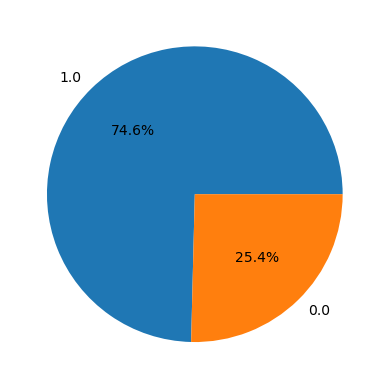

In [ ]:
# Counts the occurrences of each class in the dataset.
x = df['class'].value_counts()
# Creates a pie chart
plt.pie(
        # Represents the frequency of each class.
        x.values,
        # Assigns class labels to each slice.
        labels = x.index,
        # Displays percentages with one decimal place.
        autopct='%1.1f%%')
plt.show()

In [23]:
# Extracts and stores independent variables
features = df.drop('class', axis=1)
# Stores the dependent variable
target = df['class']

X_train, X_val,Y_train, Y_val = train_test_split(features, 
                                    # Allocates 80% of data for training and 20% for validation
                                    target,
                                    test_size=0.2,
                                    # ensures reproducibility
                                    random_state=42)
# Oversamples the minority class ensuring both classes have equal representation
ros = RandomOverSampler(sampling_strategy=1.0,
                        random_state=0)
# Applies oversampling to the training dataset
X, Y = ros.fit_resample(X_train, Y_train)
X.shape, Y.value_counts()

((302, 30),
 class
 0.0    151
 1.0    151
 Name: count, dtype: int64)

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 5-6: Model Training and Evaluation</p>

In [26]:
from sklearn.metrics import roc_auc_score as ras

models = [LogisticRegression(class_weight='balanced'), XGBClassifier(), SVC(kernel='rbf', probability=True)] 
for model in models:
    # Trains each model in the "models" list .
    model.fit(X, Y)
    print(f'{model} : ')
    # Predicts outcomes on the training data.
    train_preds = model.predict(X)
    # ras(y_resampled, train_preds): Computes the ROC AUC score for training accuracy
    print('Training Accuracy : ', ras(Y, train_preds))
    # Predicts outcomes on the validation dataset.
    val_preds = model.predict(X_val)
    # ras(y_val, val_preds): Computes the ROC AUC score for validation accuracy
    print('Validation Accuracy : ', ras(Y_val, val_preds))
    print()


LogisticRegression(class_weight='balanced') : 
Training Accuracy :  0.7582781456953642
Validation Accuracy :  0.8117760617760617

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.7808880308880308

SVC(probability=True) : 
Training Accu

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 7: Analyzing Model Performance</p>

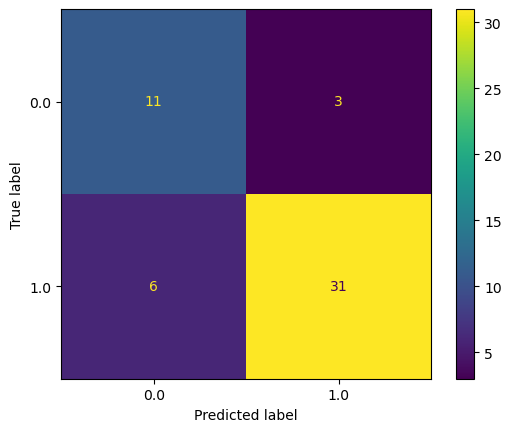

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_val, Y_val)
plt.show()

In [28]:
# True Positives (TP) = 31 : The model correctly predicted 31 healthy individuals.
# True Negatives (TN) = 11 : The model correctly predicted 11 unhealthy individuals.
# False Positives (FP) = 3 : The model incorrectly classified 3 unhealthy individuals as healthy.
# False Negatives (FN) = 6 : The model incorrectly classified 6 healthy individuals as unhealthy.

> This analysis concludes that the model correctly classifies most cases but still misclassified a few unhealthy patients (FN = 6)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, models[0].predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.65      0.79      0.71        14
         1.0       0.91      0.84      0.87        37

    accuracy                           0.82        51
   macro avg       0.78      0.81      0.79        51
weighted avg       0.84      0.82      0.83        51

